<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/The_Analytics_All_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Eğitim veri setini yükleme
train_data = pd.read_csv("train.csv")

# Test veri setini yükleme
test_data = pd.read_csv("test_x.csv")

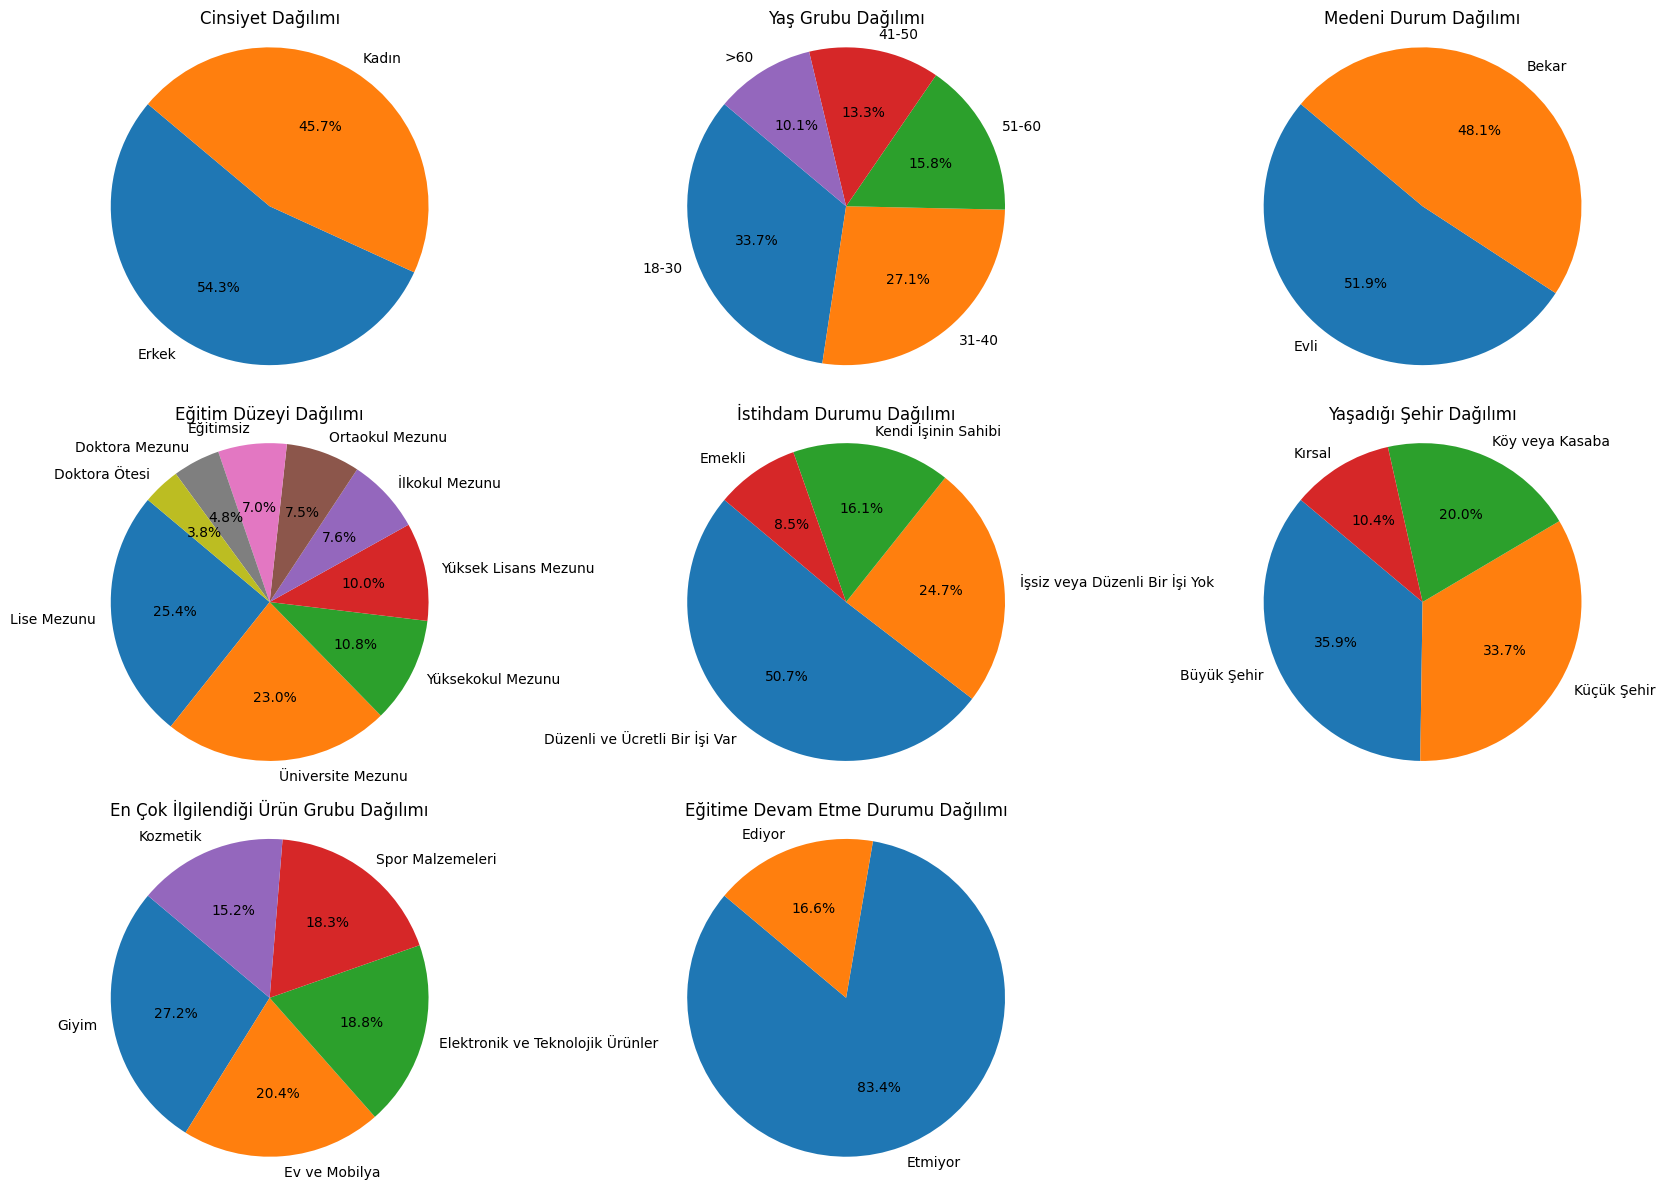

In [3]:
import matplotlib.pyplot as plt

testclass = train_data[["Cinsiyet", "Yaş Grubu", "Medeni Durum", "Eğitim Düzeyi", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitime Devam Etme Durumu"]]
# Pasta grafikler
plt.figure(figsize=(16, 12))

for i, column in enumerate(testclass.columns, start=1):
    plt.subplot(3, 3, i)
    data_counts = testclass[column].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"{column} Dağılımı")
    plt.axis('equal')

plt.tight_layout()
plt.show()




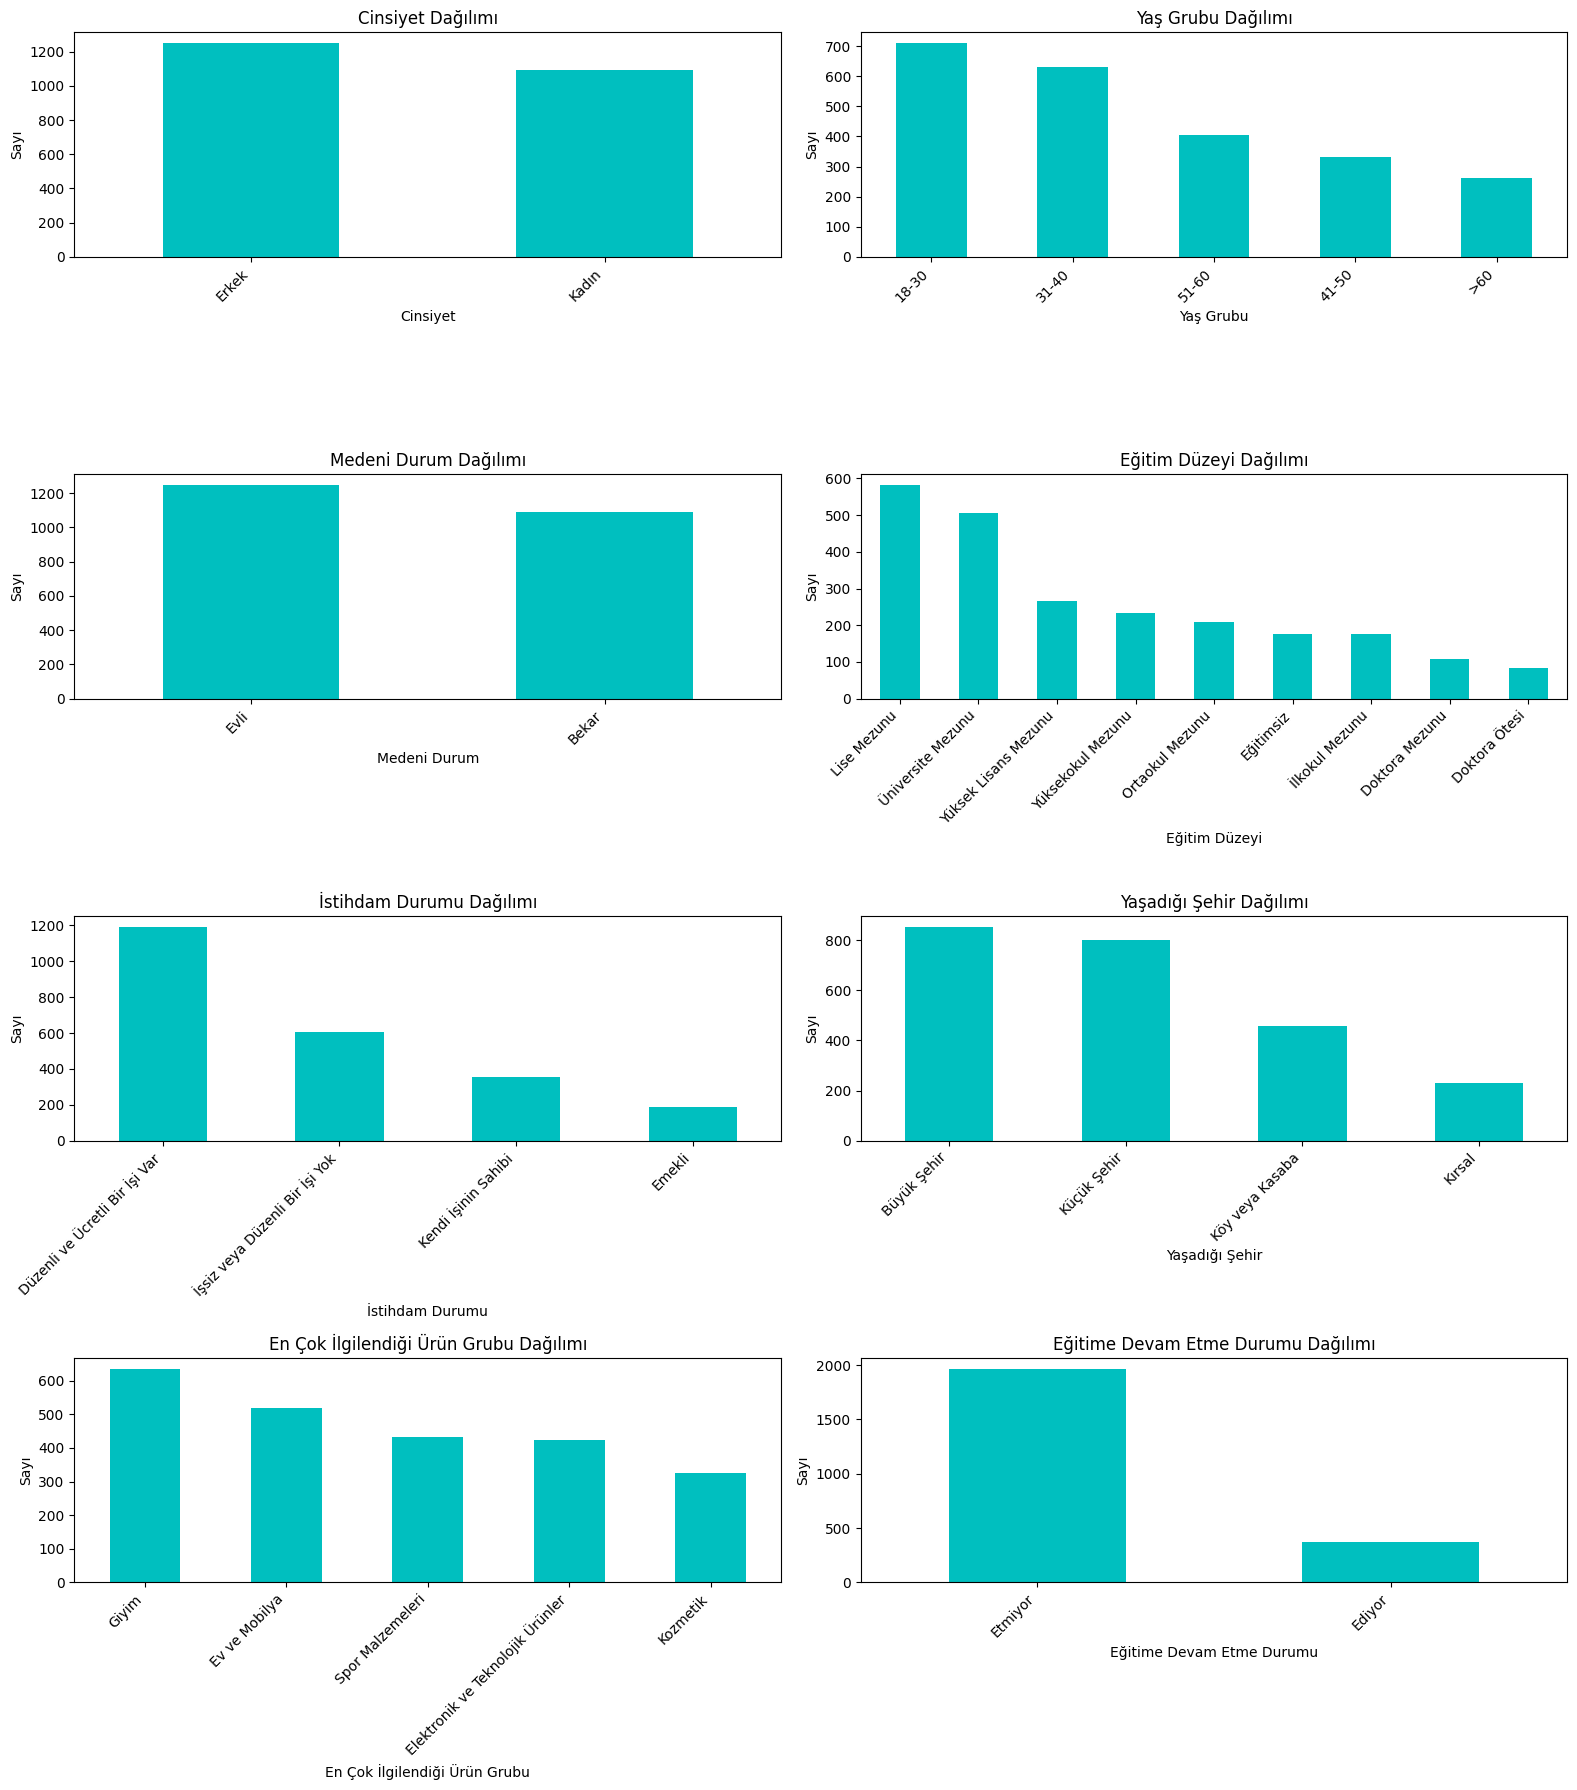

In [4]:
import matplotlib.pyplot as plt

testclass = test_data[["Cinsiyet", "Yaş Grubu", "Medeni Durum", "Eğitim Düzeyi", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitime Devam Etme Durumu"]]

plt.figure(figsize=(16, 18))  # Boyutları ayarlayın

for i, column in enumerate(testclass.columns, start=1):
    plt.subplot(4, 2, i)  # Dört sıra, iki sütunlu altgrafikler oluşturur
    data_counts = testclass[column].value_counts()
    data_counts.plot(kind='bar', color='c')  # Çubuk grafik türünü ve renkleri belirleyin
    plt.title(f"{column} Dağılımı")
    plt.xlabel(column)
    plt.ylabel("Sayı")
    plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


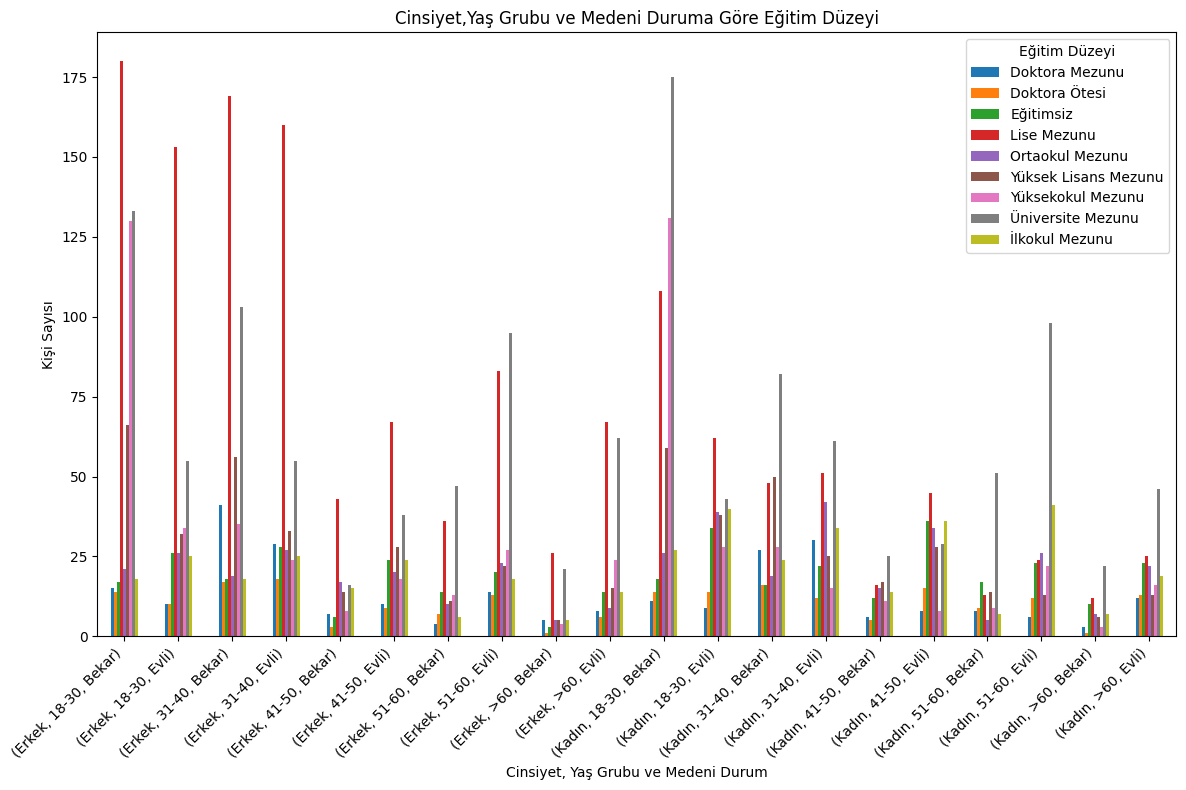

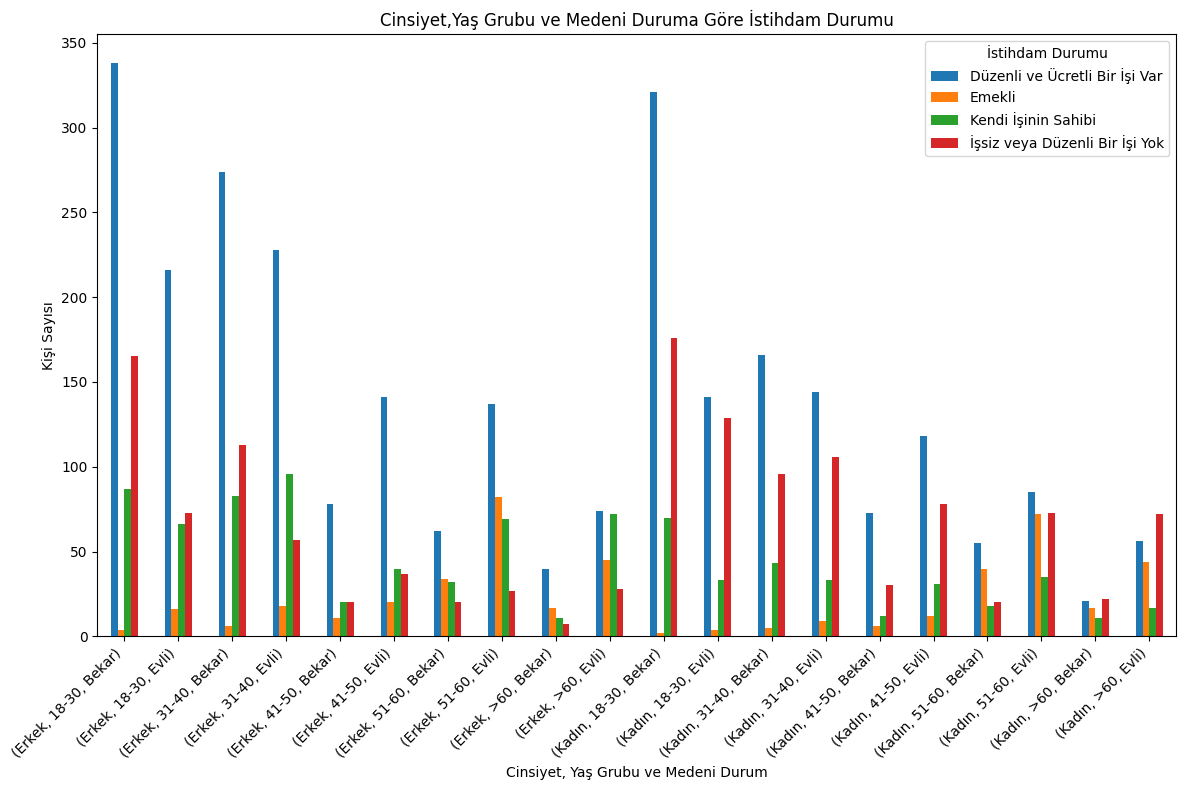

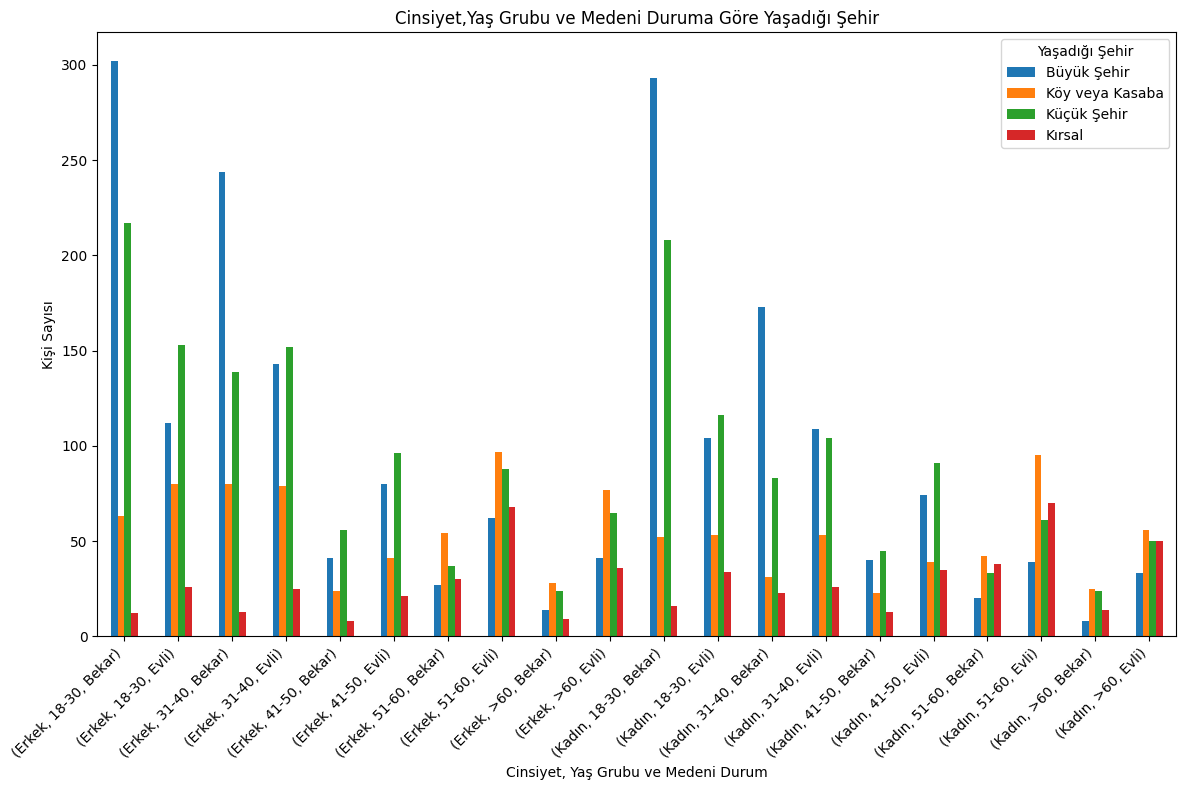

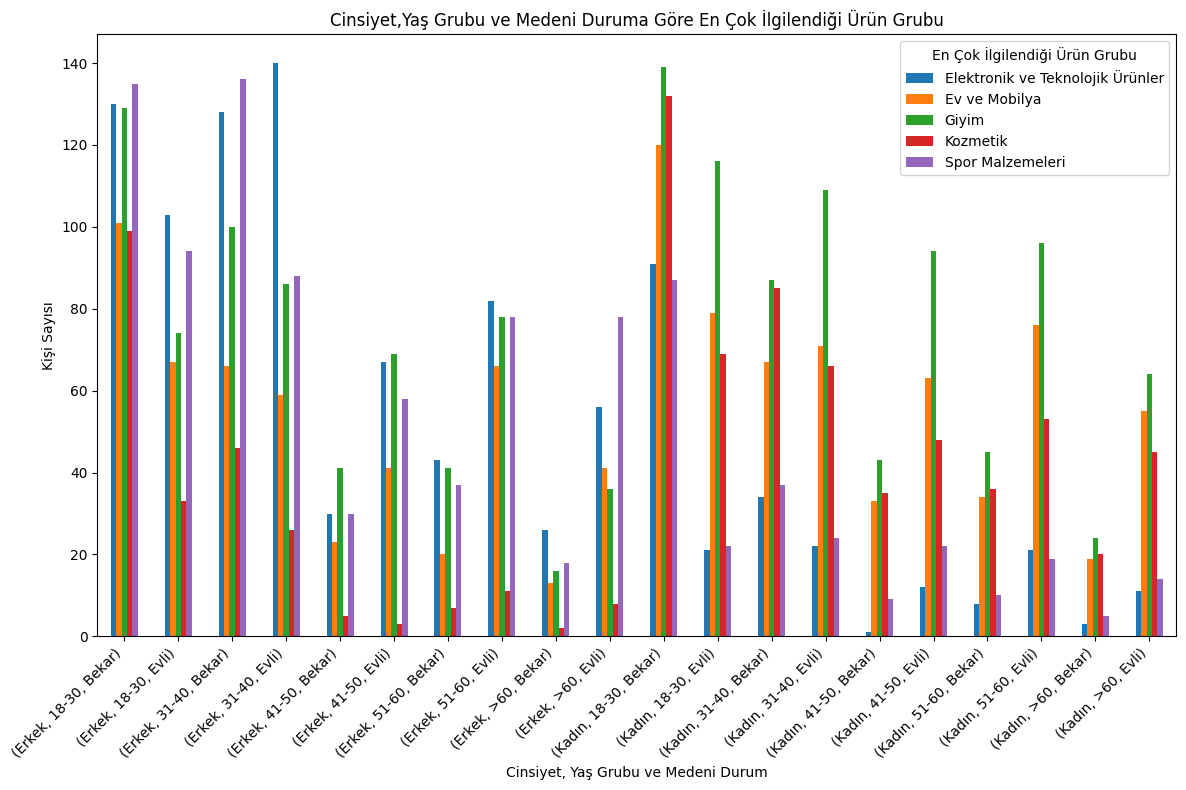

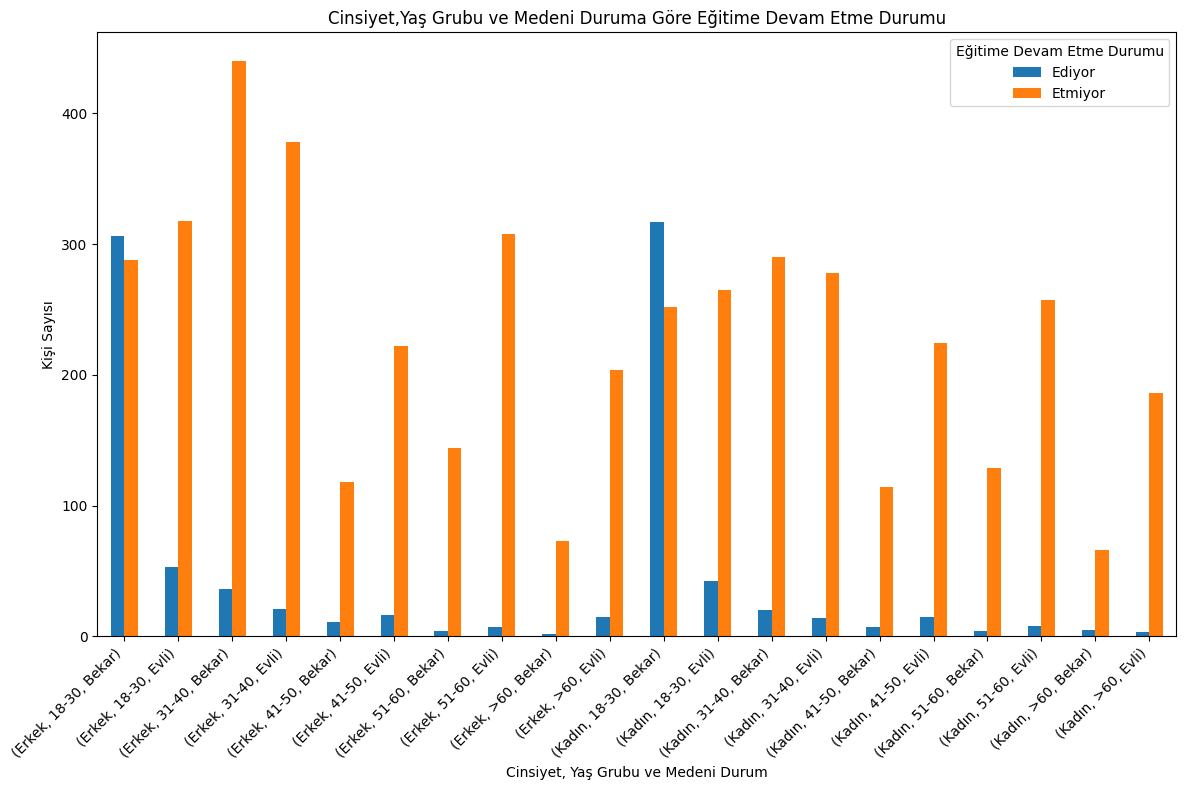

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

testclass1=testclass.drop(columns=["Cinsiyet","Medeni Durum","Yaş Grubu"])# Pivot Tabloda dahil olanları Kaldırdım
testclass1
data = pd.DataFrame(train_data)
for sutun in testclass1:
# Pivot table oluşturulması
    pivot_table = data.pivot_table(index=["Cinsiyet", "Yaş Grubu","Medeni Durum"], columns=f"{sutun}", aggfunc="size", fill_value=0)

    # Bar plot grafiğinin oluşturulması
    pivot_table.plot(kind="bar", figsize=(12, 8))
    plt.title(f"Cinsiyet,Yaş Grubu ve Medeni Duruma Göre {sutun}")
    plt.xlabel("Cinsiyet, Yaş Grubu ve Medeni Durum")
    plt.ylabel("Kişi Sayısı")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title=f"{sutun}")
    plt.tight_layout()
    plt.show()


In [6]:
testclass1 = testclass[3:7]

"line": Çizgi grafiği
"bar": Çubuk grafiği (varsayılan)
"barh": Yatay çubuk grafiği
"hist": Histogram
"box": Kutu grafiği
"kde": Kernel yoğunluk tahmini grafiği
"density": Yoğunluk grafiği (kernel yoğunluk tahmini ile aynıdır)
"area": Alan grafiği
"pie": Pasta grafiği
"scatter": Nokta dağılım grafiği
"hexbin": Hexbin grafiği **kalın metin**

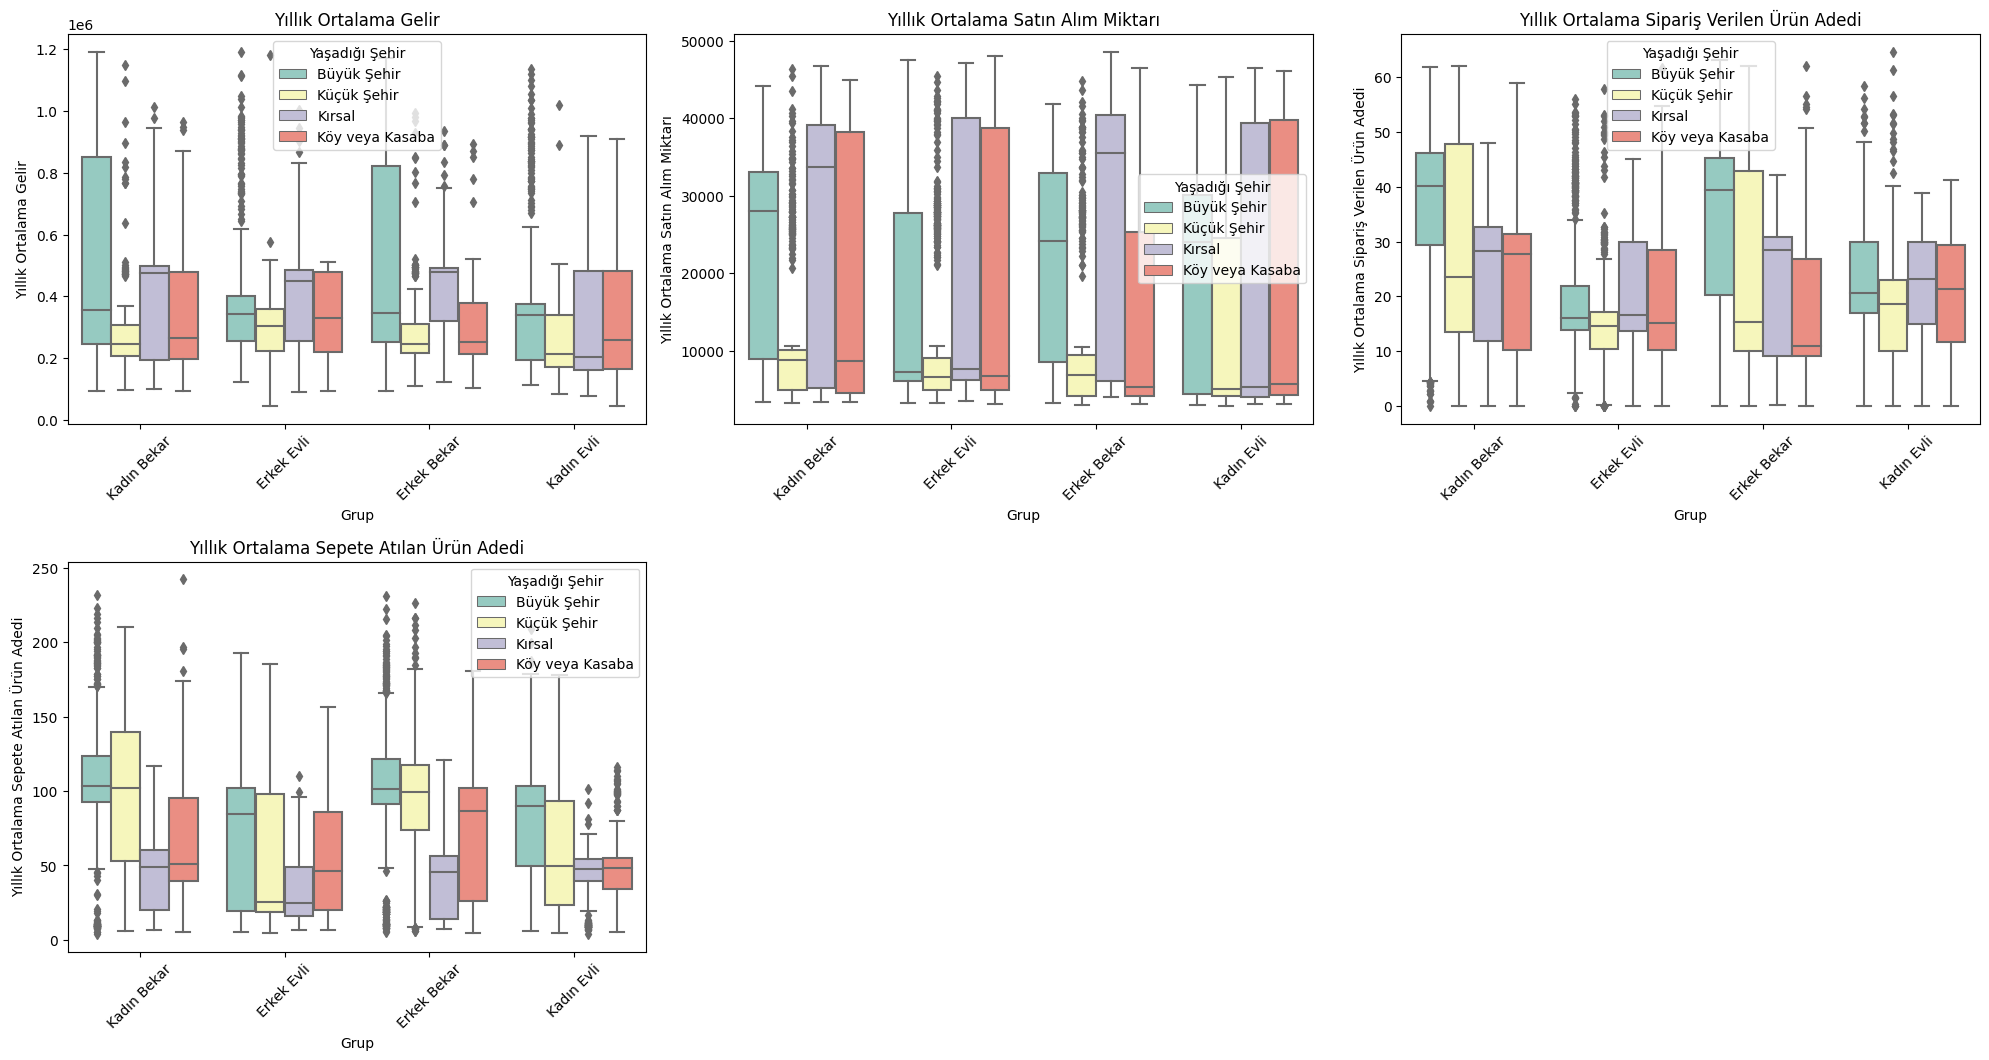

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_data1 = pd.DataFrame(train_data)

features = [
    "Yıllık Ortalama Gelir",
    "Yıllık Ortalama Satın Alım Miktarı",
    "Yıllık Ortalama Sipariş Verilen Ürün Adedi",
    "Yıllık Ortalama Sepete Atılan Ürün Adedi"
]

# Grup sütunu oluşturma
train_data1["Grup"] = train_data1["Cinsiyet"] + " " + train_data1["Medeni Durum"]

plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=train_data1, x="Grup", y=feature, hue="Yaşadığı Şehir", palette="Set3")
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [51]:
# Cinsiyet sınıflama
# Yaş grubu sıralı
# medeni durum sınıflama
# Eğitim düzeyi Sıralı
# İstihdam durumu sınıflama
# Yaşadığı Şehir sıralama
# En Çok İlgilendiği Ürün Grubu sınıflama
#Eğitime Devam Etme Durumu

import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data1=train_data.copy()
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
categorical_columns = ["Cinsiyet", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"]
train_data1 = pd.get_dummies(train_data1, columns=categorical_columns, drop_first=True)

# Label Encoding yapma
label_encoder = LabelEncoder()

ordinal_columns = ["Yaş Grubu", "Eğitim Düzeyi","Öbek İsmi"]
for column in ordinal_columns:
    train_data1[column] = label_encoder.fit_transform(train_data1[column])

train_data1


,index,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Grup,Cinsiyet_Kadın,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,1,5,748266.440879,32010.900881,37.310644,3,102.936904,Kadın Bekar,1,...,0,0,0,0,0,0,0,0,0,1
1,1,4,3,246298.609605,4145.729891,11.554851,4,82.176053,Erkek Evli,0,...,1,0,0,1,0,0,0,0,1,1
2,2,0,3,268582.732360,9924.379414,55.353236,7,141.661426,Erkek Bekar,0,...,0,0,0,1,0,0,1,0,0,0
3,3,3,3,327721.837865,6417.780714,15.417239,2,17.097397,Erkek Evli,0,...,1,0,0,0,1,0,1,0,0,1
4,4,1,4,397431.626948,7886.663061,14.689837,2,20.470459,Erkek Evli,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,4,7,478054.247819,43182.299801,31.356284,5,51.600436,Kadın Bekar,1,...,0,0,1,0,0,0,0,1,0,1
5456,5456,3,1,481852.853651,42107.996193,26.288620,5,49.190536,Erkek Evli,0,...,1,0,1,0,0,1,0,0,0,1
5457,5457,3,8,309443.687351,4655.392445,5.156906,0,9.537384,Kadın Evli,1,...,0,0,0,1,0,1,0,0,0,1
5458,5458,0,6,266604.268016,9016.165906,39.205399,7,143.281718,Kadın Bekar,1,...,0,0,0,0,0,1,0,0,0,0


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test_data1=test_data.copy()
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
categorical_columns = ["Cinsiyet", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"]
test_data1 = pd.get_dummies(test_data1, columns=categorical_columns, drop_first=True)

# Label Encoding yapma
label_encoder = LabelEncoder()

ordinal_columns = ["Yaş Grubu", "Eğitim Düzeyi"]
for column in ordinal_columns:
    test_data1[column] = label_encoder.fit_transform(test_data1[column])

test_data1

,index,Yaş Grubu,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Medeni Durum_Evli,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,3,5,365331.930346,5566.587664,15.442635,19.646460,0,1,0,0,0,1,0,0,0,1,0,0,1
1,1,2,3,414899.236174,6756.766203,14.957246,19.675863,0,0,0,0,1,0,0,0,0,0,0,1,1
2,2,4,2,152825.872271,4493.915682,10.907930,46.904518,1,1,0,0,1,0,1,0,0,1,0,0,1
3,3,3,1,489052.908472,42670.646595,32.333021,48.083609,1,1,0,0,0,1,0,0,0,0,1,0,1
4,4,0,5,323635.711534,5959.266948,4.519968,12.752491,0,1,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,0,6,259190.078834,9559.156534,41.883661,117.627785,1,0,0,1,0,0,1,0,1,0,0,0,0
2336,2336,1,3,194580.563177,4070.232154,20.082996,45.659622,1,1,0,0,1,0,0,1,1,0,0,0,1
2337,2337,4,5,357730.521969,22589.204381,18.922305,100.691379,0,1,0,0,0,0,0,0,1,0,0,0,1
2338,2338,0,1,213179.637202,4205.390562,10.758108,97.778913,0,1,0,0,0,0,1,0,0,0,0,1,1


Logistic Regression Accuracy: 0.9505494505494505
Random Forest Accuracy: 0.9642857142857143
K-Nearest Neighbors Accuracy: 0.9203296703296703


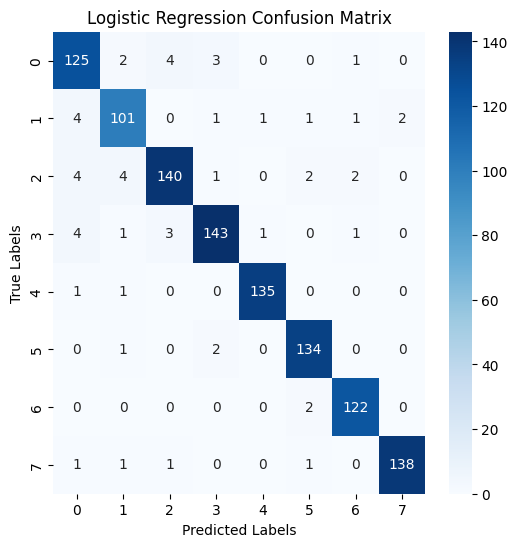

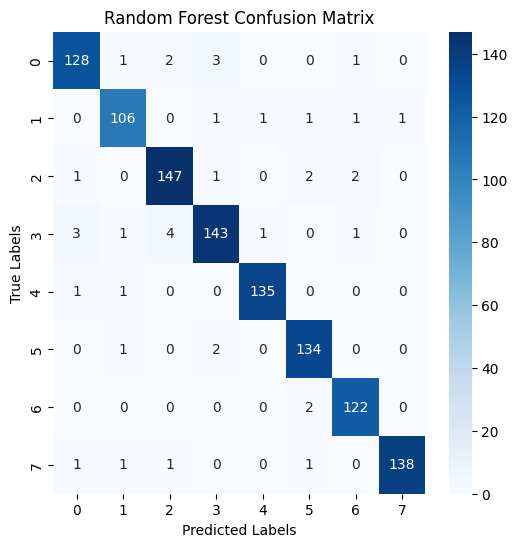

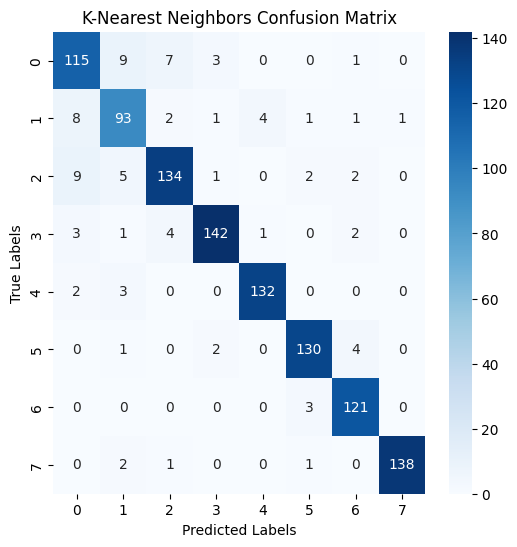

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Tahmin etmek istediğimiz sütun
y = train_data1["Öbek İsmi"]

# Tahmin etmek istediğimiz özellik hariç diğer tüm sütunları al
X = train_data1.drop(columns=["Öbek İsmi","index","Grup"],axis=1)

# Verileri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.transform(test_data1.drop("index",axis=1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Modelleri oluşturma
log_model = LogisticRegression(solver='liblinear')
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Modelleri eğitme
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Modellerden tahminler yapma
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# Doğruluk değerlerini hesaplama
log_accuracy = accuracy_score(y_test, log_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Karışıklık matrisleri
log_cm = confusion_matrix(y_test, log_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Doğruluk değerlerini ekrana yazdırma
print("Logistic Regression Accuracy:", log_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Karışıklık matrislerini görselleştirme
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(log_cm, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(knn_cm, "K-Nearest Neighbors Confusion Matrix")


In [54]:
rf_preds = rf_model.predict(test_X_scaled)
rf_preds

array([2, 2, 1, ..., 6, 4, 5])

In [56]:
test_data["Tahminler"]=rf_preds

In [68]:
for i in range(len(test_data["Tahminler"])):
    if test_data["Tahminler"][i] == 0:
        test_data["Tahminler"][i] = "Obek_0"
    elif test_data["Tahminler"][i] == 1:
        test_data["Tahminler"][i] = "Obek_1"
    elif test_data["Tahminler"][i] == 2:
        test_data["Tahminler"][i] = "Obek_2"
    elif test_data["Tahminler"][i] == 3:
        test_data["Tahminler"][i] = "Obek_3"
    elif test_data["Tahminler"][i] == 4:
        test_data["Tahminler"][i] = "Obek_4"
    elif test_data["Tahminler"][i] == 5:
        test_data["Tahminler"][i] = "Obek_5"
    elif test_data["Tahminler"][i] == 6:
        test_data["Tahminler"][i] = "Obek_6"
    elif test_data["Tahminler"][i] == 7:
        test_data["Tahminler"][i] = "Obek_7"



<ipython-input-68-49bf4c9e64db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Tahminler"][i] = "Obek_2"


In [70]:
test_data.to_csv("Submission.csv", index=False)
